In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None) 

In [45]:
df = pd.read_excel("df.xlsx")
df['review_dttm'] = pd.to_datetime(df['review_dttm'], errors='coerce')
df['finish_dttm'] = pd.to_datetime(df['finish_dttm'], errors='coerce')
df['resolution_hours'] = (df['finish_dttm'] - df['review_dttm']).dt.total_seconds() / 3600
emotion_map = {'Позитивный': 1, 'Негативный': 0}
df['emotion_binary'] = df['review_emotion'].map(emotion_map)

def map_mark(mark):
    if pd.isna(mark): return np.nan
    s = str(mark)
    if s.isdigit(): return float(int(s))
    s_lower = s.lower()
    if 'негатив' in s_lower: return 2.0
    if 'нейтрал' in s_lower: return 3.0
    if 'позитив' in s_lower: return 4.0
    return np.nan
df['review_mark_num'] = df['review_mark'].apply(map_mark)

In [46]:
df

,review_dttm,finish_dttm,id_client,company,review_mark,review_emotion,review_source,business_line,product,reason,review_theme,subtheme,review_text,solution_flg,gender_cd,education_level_cd,marital_status_cd,children_cnt,citizenship_country,segment_name,subscription_important_flg,new_flg,influencer_flg,age_segment,csat_score,resolution_hours,emotion_binary,review_mark_num
0,2025-02-18 15:41:00,2025-02-18 16:56:49.353,fb30834209a9c7f60612c64b82c75ffa,Банк,1,Негативный,banki.ru,кредитные карты,кредитная карта,Не определено,тарифы и условия,консультация по продукту,"Непрозрачные условия, скрытые комсисии. Почему...",проблема решена,M,NaN,UNM,0.0,РФ,Доходные,0.0,0.0,0.0,Молодежь,NaN,1.263709,0,1.0
1,2025-03-24 20:06:00,2025-03-28 17:42:39.772,6601bfab426e4f56cc1e44d859683763,Страховая,1,Негативный,banki.ru,страховая,каско,Не определено,страховое событие,жалоба по страховому случаю,"Обратился по каско , влетел камень в лобовое с...",проблема решена,M,NaN,NaN,NaN,РФ,NaN,NaN,NaN,NaN,NaN,NaN,93.611048,0,1.0
2,2025-07-08 07:40:43,2025-07-08 10:29:04.740,f1f8eff66eaf2289f61deec744871d6b,Банк,5,Позитивный,banki.ru,депозитные продукты,дебетовая карта,Не определено,мп/лк/терминал,установка/обновление приложения,Я уже очень давно пользуюсь услугами Тбанка и ...,не указано,M,GRD,MAR,0.0,РФ,Малодоходные,0.0,0.0,0.0,Взрослые,NaN,2.806039,1,5.0
3,2025-08-07 22:51:48,2025-08-08 09:35:34.593,5ca669878eaf593f68c10e163246357b,SME,5,Позитивный,banki.ru,sme,расчетный счет,Не определено,дополнительные услуги,консультация по услуге,"Уважаемое руководство Т- Банка,\n\n\nНастоящим...",не указано,F,GRD,MAR,0.0,РФ,Высокодоходные без ПМ,0.0,0.0,1.0,Взрослые,NaN,10.729609,1,5.0
4,2025-02-13 21:38:40,2025-02-14 08:04:44.643,7a436100b113ce78c8a7a02974521a16,Банк,5,Позитивный,banki.ru,депозитные продукты,дебетовая карта,Не определено,кэшбек,корректировка кэшбека,Выбрал на текущий месяц повышенный кэшбек на к...,не указано,M,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,1.0,Сеньоры,NaN,10.434623,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56815,2025-05-23 18:29:43,2025-05-23 19:25:21.222,19a90f722e0088dbd5c1140326475d4c,Страховая,5,Позитивный,banki.ru,страховая,взр,Не определено,страховое событие,консультации по существующему страховому событию,Отдыхали в новый год в Тель-Авиве с ребёнком. ...,не указано,M,NaN,DIV,0.0,РФ,NaN,NaN,NaN,NaN,NaN,NaN,0.927284,1,5.0
56816,2025-09-26 10:16:00,2025-09-26 13:27:02.360,3e5ccb5ffa7055f82085ccd18b7190c4,Банк,5,Позитивный,sravni.ru,поддержка сотрудников,не определено,Не определено,тарифы и условия,консультация по продукту,Здравствуйте я очень довольна работой группы п...,не указано,F,GRD,CIV,0.0,РФ,Доходные,0.0,0.0,0.0,Сеньоры,NaN,3.183989,1,5.0
56817,2025-10-23 18:41:00,2025-10-23 19:20:28.205,ff8dee14ae0b2c22593ab20ffb9d8e26,Банк,5,Позитивный,sravni.ru,депозитные продукты,дебетовая карта,Не определено,мп/лк/терминал,консультация по интерфейсу,Банк и прилодение\nПо моему мнению лучший банк...,не указано,M,NaN,MAR,0.0,РФ,Доходные,0.0,0.0,0.0,Взрослые,NaN,0.657835,1,5.0
56818,2025-09-02 13:12:13,2025-09-02 13:35:01.523,b8deb649421f64fc4a5b6c71b350f528,Банк,5,Позитивный,banki.ru,премиальные сервисы,premium,Не определено,"платежи, переводы и операции",отмена / оспаривание,Огромная благодарность сотруднику Т-Банка (Лео...,не указано,M,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,1.0,Взрослые,NaN,0.380145,1,5.0


In [47]:
df["hours_of_review"] = (df.finish_dttm - df.review_dttm).dt.total_seconds() / 3600

In [48]:
df.review_mark = df.review_mark.apply(lambda x: 2.5 if x == "без оценки (негативный)" else 4.5)

In [49]:
by_df = df.groupby("id_client")["review_mark_num"].apply(list).to_frame().reset_index()
by_df["has_negative"] = by_df["review_mark_num"].apply(lambda marks: any(mark <= 2.5 for mark in marks if not pd.isna(mark)) and len(marks) > 1)
by_df["has_positive_after_negative"] = by_df["review_mark_num"].apply(
    lambda marks: any(marks[i] >= 4.0 for i in range(1, len(marks)) if not pd.isna(marks[i]) and not pd.isna(marks[i-1]) and marks[i-1] <= 2.5)
)
by_df_filtered = by_df[by_df["has_negative"] & by_df["has_positive_after_negative"]]
by_df_filtered.shape

(180, 4)

In [50]:
by_df = df.groupby("id_client")["review_mark_num"].apply(list).to_frame().reset_index()
# by_df
# by_df["second_review"] = by_df[by_df["review_mark_num"].apply(lambda x: len(x) > 1)]["review_mark_num"].apply(lambda x: x[1])
by_df["second_review"] = by_df["review_mark_num"].apply(lambda x: x[1] if len(x) > 1 else np.nan)
print(by_df["second_review"].mean())

by_df.dropna(subset=["second_review"], inplace=True)
by_df["second_review_increase_from_first"] = by_df["second_review"] - by_df["review_mark_num"].apply(lambda x: x[0])
print(by_df["second_review_increase_from_first"].mean())

3.6325149816354148
0.013145176879953605


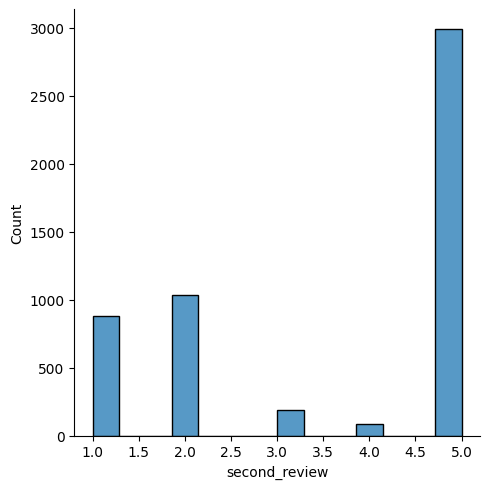

In [51]:
sns.displot(by_df["second_review"])